In [1]:
# Importing libraries
import pandas
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import svm
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing dataset
data= pandas.read_csv('D:\Files\Data Science\Anaconda\Sample csv files\Diabetes.csv')
# Data shuffling
data= data.sample(frac= 1)
# Shape of dataset
data.shape

(768, 9)

In [3]:
# Viewing our dataframe
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
653,2,120,54,0,0,26.8,0.455,27,No
596,0,67,76,0,0,45.3,0.194,46,No
598,1,173,74,0,0,36.8,0.088,38,Yes
623,0,94,70,27,115,43.5,0.347,21,No
147,2,106,64,35,119,30.5,1.400,34,No


In [4]:
# Names of columns in dataset
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
# Checking null values in dataset
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# Checking duplicate values
data.duplicated().sum()

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 653 to 90
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 60.0+ KB


In [8]:
x= data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y= data[[ 'Outcome']]

In [9]:
# Logistic regression
lor= LogisticRegression()
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state= 1)
lor.fit(x_train, y_train)
y_pred= lor.predict(x_test)
print('Accuracy of Logistic regression = ', (accuracy_score(y_pred, y_test)*100).round(decimals= 3) , '% .')
print('Confusion Matrix of Logistic regression = ','\n', confusion_matrix(y_pred, y_test) )
print('Classification report of Logistic regression = ','\n', classification_report(y_pred, y_test) )

Accuracy of Logistic regression =  72.078 % .
Confusion Matrix of Logistic regression =  
 [[86 35]
 [ 8 25]]
Classification report of Logistic regression =  
               precision    recall  f1-score   support

          No       0.91      0.71      0.80       121
         Yes       0.42      0.76      0.54        33

    accuracy                           0.72       154
   macro avg       0.67      0.73      0.67       154
weighted avg       0.81      0.72      0.74       154



In [10]:
# Decision Tree Classifier
dtc= DecisionTreeClassifier(random_state= 1)
dtc.fit(x_train, y_train)
y_pred= dtc.predict(x_test)
print('Accuracy of Decision Tree Classifier = ', (accuracy_score(y_pred, y_test)*100).round(decimals= 3) , '% .')
print('Confusion Matrix of Logistic regression = ','\n', confusion_matrix(y_pred, y_test) )
print('Classification report of Logistic regression = ','\n', classification_report(y_pred, y_test) )

Accuracy of Decision Tree Classifier =  71.429 % .
Confusion Matrix of Logistic regression =  
 [[78 28]
 [16 32]]
Classification report of Logistic regression =  
               precision    recall  f1-score   support

          No       0.83      0.74      0.78       106
         Yes       0.53      0.67      0.59        48

    accuracy                           0.71       154
   macro avg       0.68      0.70      0.69       154
weighted avg       0.74      0.71      0.72       154



In [11]:
kfold= KFold(n_splits= 5, shuffle= True)
for train_set, test_set in kfold.split(x):
    print(train_set, '\n','\n', test_set)

[  0   1   2   3   4   5   6   8   9  10  12  13  14  15  16  17  19  20
  21  22  23  25  26  27  28  29  30  31  32  33  35  36  38  39  40  41
  43  45  46  47  48  49  51  52  54  55  56  57  58  61  63  64  67  68
  69  71  72  75  76  78  79  80  81  82  83  84  85  86  88  90  91  92
  93  95  96  97  98  99 101 102 103 105 107 109 110 111 112 113 114 115
 116 117 118 119 121 122 124 125 126 128 129 130 131 133 134 135 136 138
 139 140 141 143 144 145 146 147 148 149 150 151 152 153 155 156 159 160
 161 162 163 164 165 166 167 168 170 171 172 173 174 175 176 177 178 179
 180 182 183 184 185 186 187 189 190 191 192 193 194 196 197 198 199 200
 202 203 205 206 207 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 234 235 236 237 238 239 240 243
 244 245 246 247 249 250 251 252 253 254 255 256 258 259 260 261 265 266
 268 269 270 271 272 273 274 275 276 278 280 281 282 284 285 286 287 288
 291 292 293 294 295 296 297 298 299 300 301 302 30

In [12]:
# AdaBoost Classifier :
kfold= model_selection.KFold(n_splits= 10, random_state= 7)
model= AdaBoostClassifier(n_estimators= 30, random_state= 7)
scores= model_selection.cross_val_score(model, x, y, cv= kfold)
print('Cross validation scores for AdaBoost Classifier : ', scores.round(decimals= 3))
print('Accuracy percentage of AdaBoost Classifier is : ', (scores.mean()*100).round(decimals= 3) , '% .')

Cross validation scores for AdaBoost Classifier :  [0.688 0.753 0.74  0.766 0.727 0.753 0.792 0.753 0.789 0.803]
Accuracy percentage of AdaBoost Classifier is :  75.661 % .


In [13]:
# XGB Classifier :
kfold= model_selection.KFold(n_splits= 10, random_state= 7)
model= XGBClassifier(n_estimators= 30, random_state= 7)
scores= model_selection.cross_val_score(model, x, y, cv= kfold)
print('Cross validation scores for XGB Classifier : ', scores.round(decimals= 3) )
print('Accuracy percentage of XGB Classifier is : ', (scores.mean()*100).round(decimals= 3) , '% .')

[07:09:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:09:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:09:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:09:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [14]:
# Random Forest Classifier :
rfc= RandomForestClassifier(n_estimators= 10)
scores= cross_val_score(rfc, x, y, scoring= 'accuracy', cv= 10)
print('Cross validation scores for Random Forest Classifier : ', scores.round(decimals= 3) )
print('Accuracy percentage of Random Forest Classifier is : ', (scores.mean()*100).round(decimals= 3) , '% .')

Cross validation scores for Random Forest Classifier :  [0.649 0.753 0.701 0.74  0.727 0.766 0.766 0.714 0.789 0.763]
Accuracy percentage of Random Forest Classifier is :  73.708 % .


In [23]:
# Comparing different classifiers :
import pandas
df= pandas.DataFrame({'Classifier names':['Logistic regression', 'Decision Tree Classifier', 'Random Forest Classifier',
                                          'AdaBoost Classifier', 'XGB Classifier'], 'Accuracy score': [72.078, 71.429, 
                                                                                                       73.708, 75.661, 
                                                                                                       75.273]})
import matplotlib.pyplot as plt
%matplotlib inline
df

,Classifier names,Accuracy score
0,Logistic regression,72.078
1,Decision Tree Classifier,71.429
2,Random Forest Classifier,73.708
3,AdaBoost Classifier,75.661
4,XGB Classifier,75.273


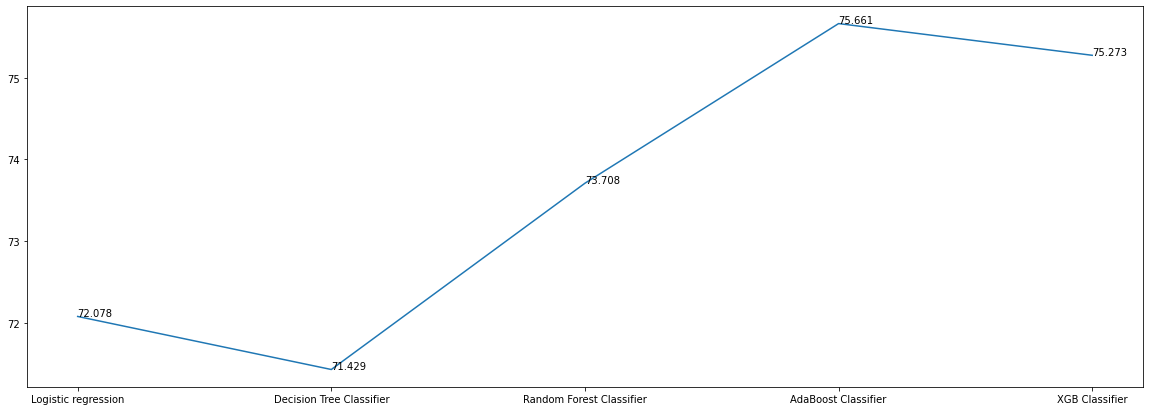

In [31]:
plt.figure(figsize= (20, 7))
plt.plot(df['Classifier names'], df['Accuracy score'])
for a,b in zip(df['Classifier names'], df['Accuracy score']): 
    plt.text(a, b, str(b))
plt.show()